In [ ]:
# Importacion de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Se importa el dataframe de exportaciones previamente limpiado
df_expo = pd.read_csv(r'/content/drive/MyDrive/Data/Processed/exportaciones_1992_2022.csv')

In [ ]:
df_expo.columns

Index(['Unnamed: 0', 'GESTION', 'MES', 'FLUJO', 'NANDINA', 'DESNAN', 'PAIS',
       'DESPAIS', 'MEDI', 'DESMEDI', 'VIASAL', 'DESVIA', 'DEPART', 'DESDEP',
       'CUCI3', 'DESCUCI3', 'GCE3', 'DESGCE3', 'CIIUR3', 'DESCIIU3', 'CLTNT',
       'KILBRU', 'VALOR_FOB'],
      dtype='object')

se procede a analizar solmente los valores globales de importasciones y exportaciones en los ultimos 30 años

In [ ]:
#2304000000
# 813 torta
# 4211 aceite

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
def cuci_expo(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION'])[col].sum().div(1000000).reset_index()
  #df = df.rename(columns={"GESTION": "YEAR", "MES": "MONTH"})
  #df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
  #df = df.set_index('DATE')
  df.fillna(0, inplace=True)
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle('Exportaciones de ' + nombre + ' (1992 - 2021)')
  axes.plot(df['GESTION'], df[col])
  axes.set_xlabel('Gestion') 
  if col == 'VALOR_FOB':
    axes.set_ylabel('Millones de Dolares')
  elif col == 'KILBRU':
    axes.set_ylabel('Mil Toneladas')
  return plt.show()

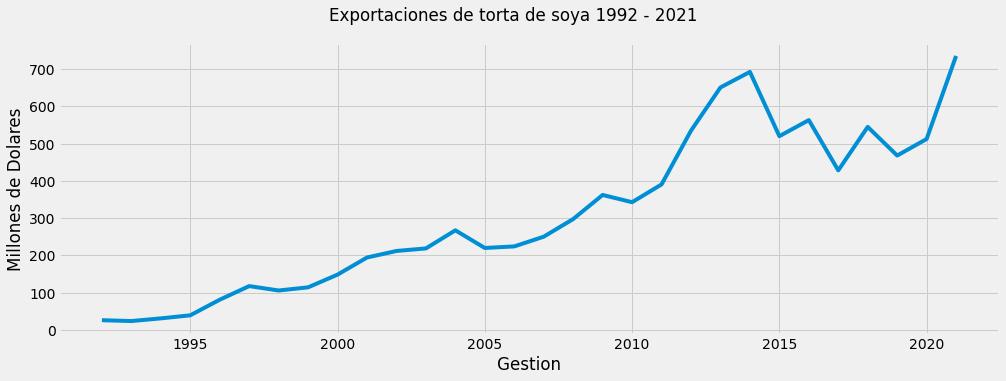

In [ ]:
cuci_expo(df_expo, 813, 'VALOR_FOB', 'torta de soya')

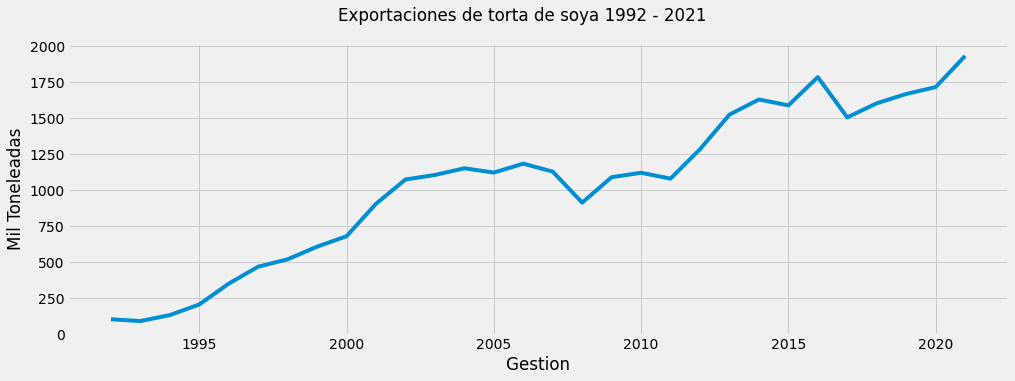

In [ ]:
cuci_expo(df_expo, 813, 'KILBRU', 'torta de soya')

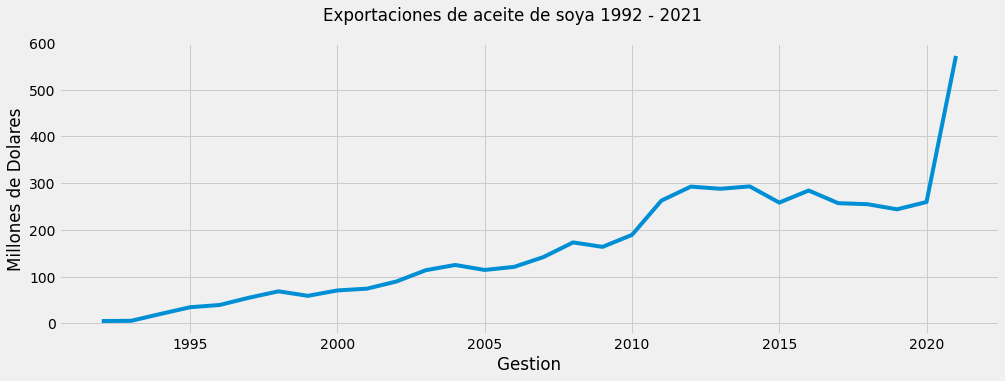

In [ ]:
cuci_expo(df_expo, 4211, 'VALOR_FOB', 'aceite de soya')

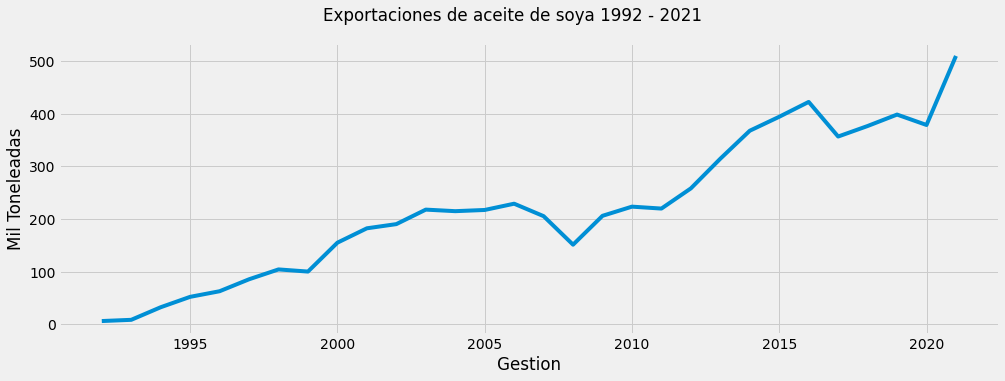

In [ ]:
cuci_expo(df_expo, 4211, 'KILBRU', 'aceite de soya')

In [ ]:
def cuci_box(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION', 'MES'])[col].sum().reset_index()
  df_aux = df.pivot_table(values=col, index='GESTION', columns='MES', fill_value=0).div(1000000).round(3)
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle('Distribucion anuel de exportaciones de ' + nombre + ' (1992 - 2021)')
  years = df['GESTION'].unique()
  axes.boxplot(df_aux)
  axes.set_xticklabels(years,rotation=45)
  axes.set_xlabel('Gestion') 
  if col == 'VALOR_FOB':
    axes.set_ylabel('Millones de Dolares')
  elif col == 'KILBRU':
    axes.set_ylabel('Mil Toneladas')
  return plt.show()


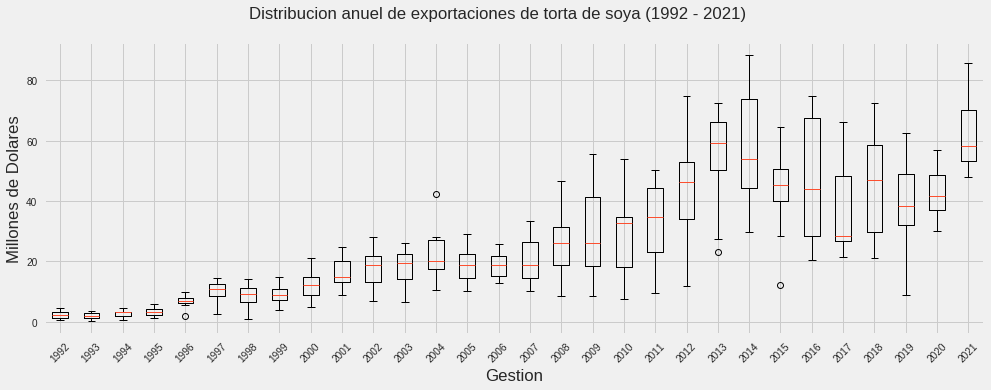

In [ ]:
cuci_box(df_expo, 813, 'VALOR_FOB', 'torta de soya')

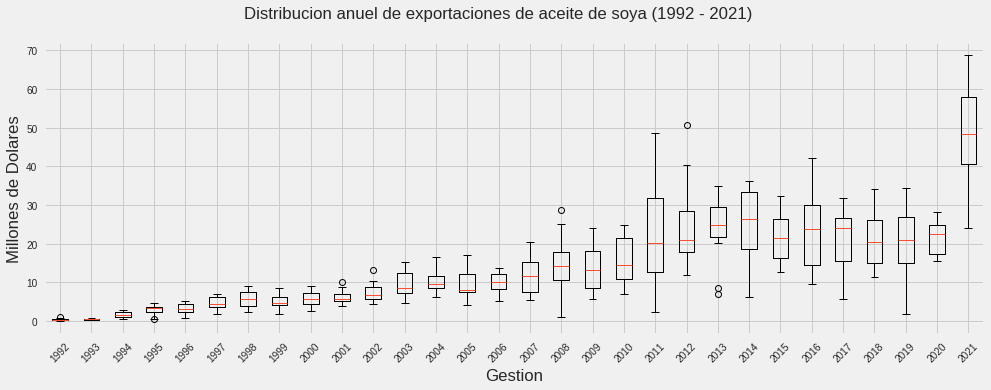

In [ ]:
cuci_box(df_expo, 4211, 'VALOR_FOB', 'aceite de soya')

In [ ]:
def cuci_box_month(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION', 'MES'])[col].sum().reset_index()
  df_aux = df.pivot_table(values=col, index='MES', columns='GESTION', fill_value=0).div(1000000).round(3)
  meses=['Enero', ' Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle('Distribucion mensual de exportaciones de ' + nombre + ' (1992 - 2021)')
  axes.boxplot(df_aux)
  axes.set_xticklabels(meses, rotation=45)
  axes.set_xlabel('Mes') 
  if col == 'VALOR_FOB':
    axes.set_ylabel('Millones de Dolares')
  elif col == 'KILBRU':
    axes.set_ylabel('Mil Toneleadas')
  return plt.show()

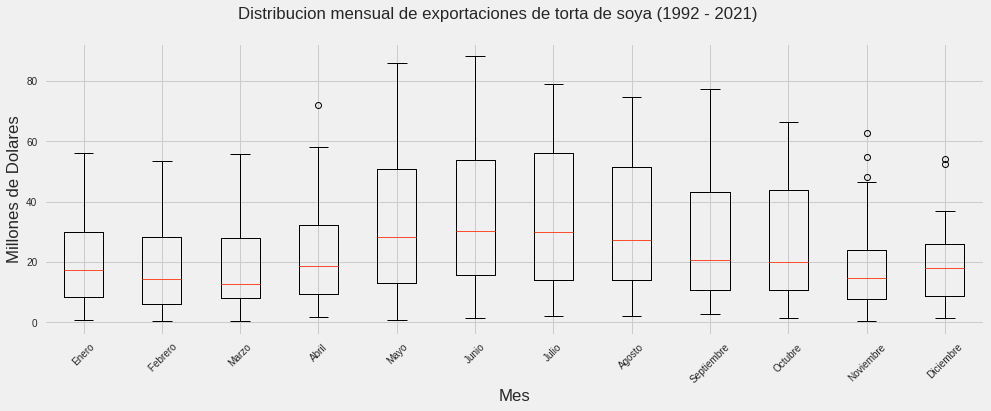

In [ ]:
cuci_box_month(df_expo, 813, 'VALOR_FOB', 'torta de soya')

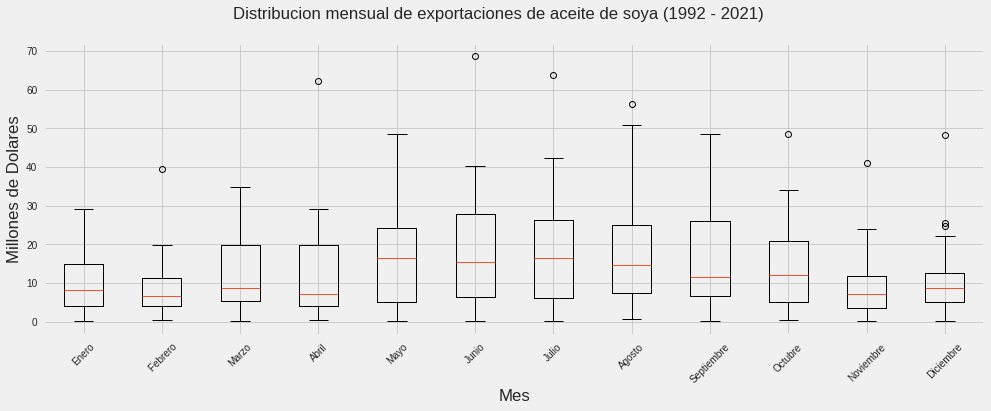

In [ ]:
cuci_box_month(df_expo, 4211, 'VALOR_FOB', 'aceite de soya')

In [ ]:
def scatter_cuci(df, cuci, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)]
  df = df.loc[:,['VALOR_FOB', 'KILBRU']].div(1000000).fillna(0)
  fig, axes = plt.subplots(figsize=(5, 5))
  fig.suptitle('Correlación entre valor y peso de ' + nombre + ' (1992 - 2021)')
  axes.scatter(x=df['VALOR_FOB'], y=df['KILBRU'])
  axes.set_xlabel('Millones de Dolares') 
  axes.set_ylabel('Mil Toneleadas')
  return plt.show()

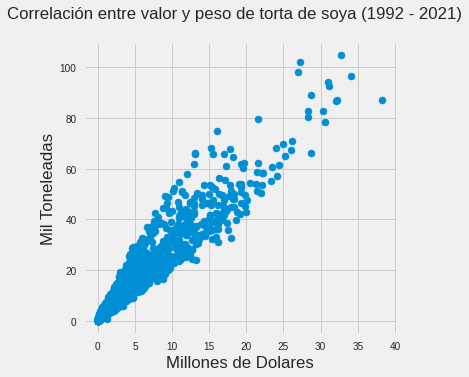

In [ ]:
scatter_cuci(df_expo, 813, 'torta de soya')

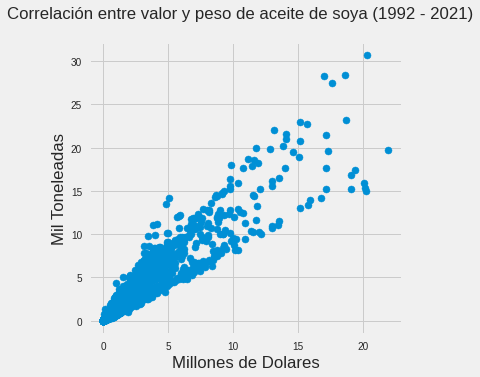

In [ ]:
scatter_cuci(df_expo, 4211, 'aceite de soya')

In [ ]:
def hist_unit(df, cuci, nombre, limite):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)]
  df['UNITARIO'] = df['VALOR_FOB'].div(df['KILBRU'].div(1000)) 
  df = df[df['UNITARIO'] < limite]
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle('Distribución de exportaciones de ' + nombre + ' 1992 - 2021')
  #axes.boxplot(df['UNITARIO'], vert=0, sym='')
  axes.hist(df['UNITARIO'], bins=100)
  axes.set_xlabel('Dolares') 
  axes.set_ylabel('Conteo')
  plt.show()
  return print(df['UNITARIO'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


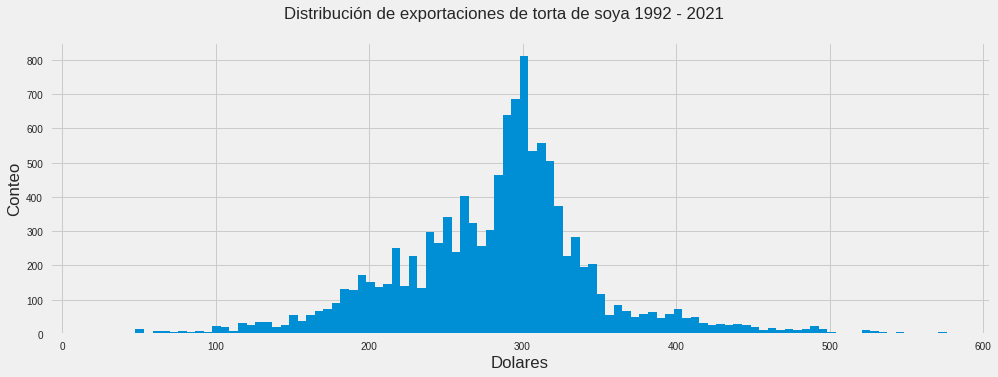

291.5900448430493


In [ ]:
hist_unit(df_expo, 813, 'torta de soya', 600)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


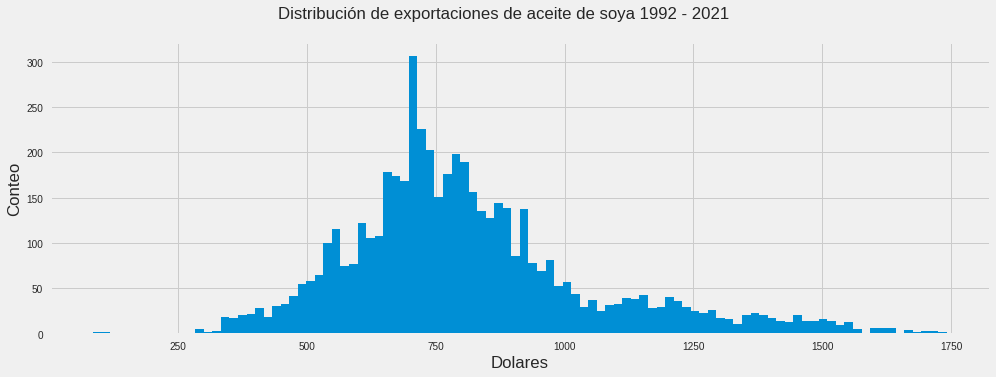

771.999375


In [ ]:
hist_unit(df_expo, 4211, 'aceite de soya', 1800)

In [ ]:
def h_bar_plot(df, cuci, col, hue, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby([hue])[col].sum().div(1000000).reset_index().sort_values(by=col, ascending=False)[:10]
  #df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby([hue])[col].sum().div(1000000).sort_values(ascending=False).reset_index(drop=True)
  fig, axes = plt.subplots()  
  sns.barplot(y=hue, x=col, data=df, ax=axes)
  if hue == 'DESVIA':
    axes.set_ylabel('Via de Salida')
    fig.suptitle('Principales vias de salida de ' + nombre + ' (1992 - 2021)')
  elif hue == 'DESPAIS':
    axes.set_ylabel('Pais')
    fig.suptitle('Principales compradores de ' + nombre + ' (1992 - 2021)')
  elif hue == 'DESMEDI':    
    axes.set_ylabel('Medio')
    fig.suptitle('Principales medios de salida de ' + nombre + ' (1992 - 2021)')
  if col == 'VALOR_FOB':
    axes.set_xlabel('Millones de Dolares')
  elif col == 'KILBRU':
    axes.set_xlabel('Mil Toneladas')
  return plt.show()

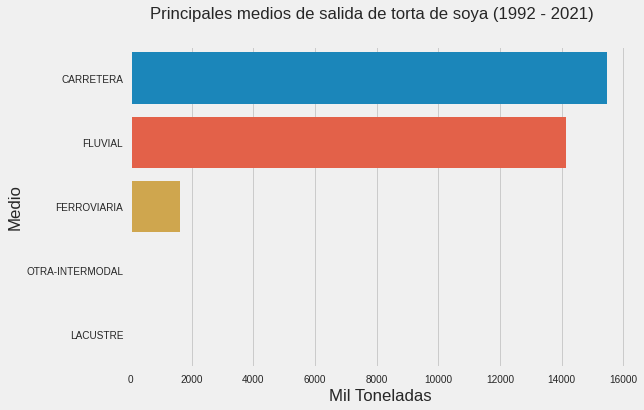

In [ ]:
h_bar_plot(df_expo, 813,'KILBRU', 'DESMEDI', 'torta de soya')

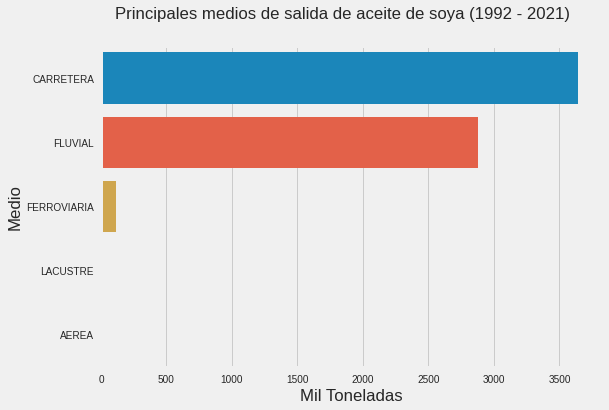

In [ ]:
h_bar_plot(df_expo, 4211,'KILBRU', 'DESMEDI', 'aceite de soya')

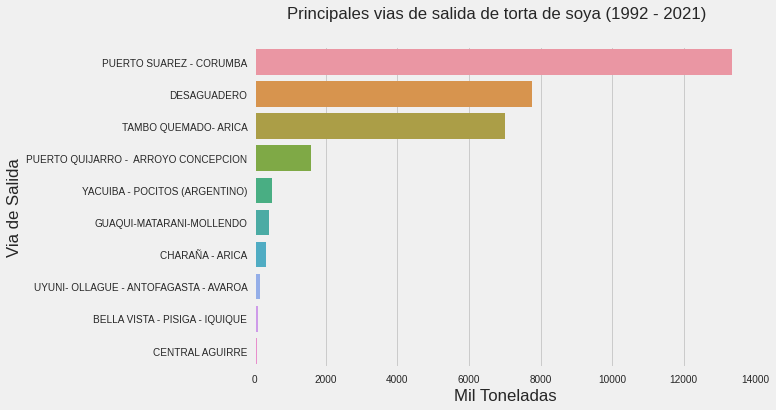

In [ ]:
h_bar_plot(df_expo, 813,'KILBRU', 'DESVIA', 'torta de soya')

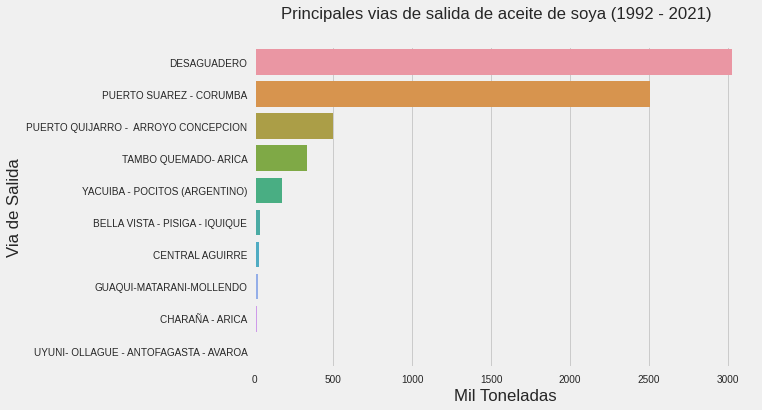

In [ ]:
h_bar_plot(df_expo, 4211,'KILBRU', 'DESVIA', 'aceite de soya')

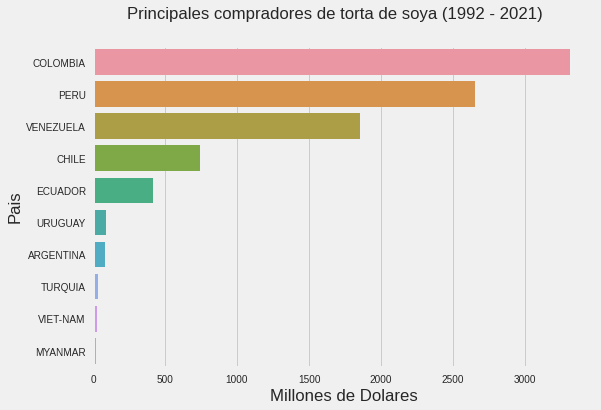

In [ ]:
h_bar_plot(df_expo, 813, 'VALOR_FOB', 'DESPAIS', 'torta de soya')

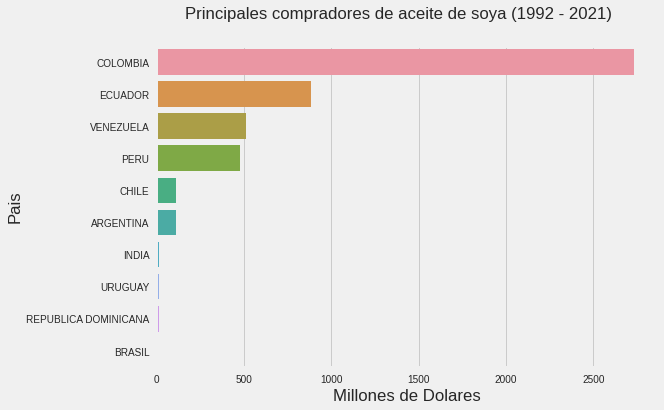

In [ ]:
h_bar_plot(df_expo, 4211,'VALOR_FOB', 'DESPAIS', 'aceite de soya')

In [ ]:
df_aceite = pd.read_excel(r"/content/drive/MyDrive/Data/Raw/Datos históricos Futuros aceite de soja EE.UU.xlsx")
df_harina = pd.read_excel(r"/content/drive/MyDrive/Data/Raw/Datos históricos Futuros harina de soja EE.UU.xlsx")

In [ ]:
df_aceite['Fecha'] = pd.to_datetime(df_aceite['Fecha'], format='%d.%m.%Y')
df_aceite = df_aceite.set_index('Fecha')
df_aceite = df_aceite.sort_index(ascending=True)
df_aceite = df_aceite['Precio']
df_aceite = df_aceite.to_frame()
df_aceite.head()

,Precio
Fecha,
1992-09-01,421.0
1992-10-01,418.0
1992-11-01,437.0
1992-12-01,436.0
1993-01-01,444.0


In [ ]:
df_harina['Fecha'] = pd.to_datetime(df_harina['Fecha'], format='%d.%m.%Y')
df_harina = df_harina.set_index('Fecha')
df_harina = df_harina.sort_index(ascending=True)
df_harina = df_harina['Último']
df_harina = df_harina.to_frame()
df_harina = df_harina.rename(columns={"Último": "Precio"})
df_harina.head()

,Precio
Fecha,
1992-01-01,175.8
1992-02-01,174.1
1992-03-01,178.7
1992-04-01,172.9
1992-05-01,183.2


In [ ]:
def comm_line(df, cuci, col, nombre, df_1, primero, ultimo):
  df = df[(df['CUCI3'] == cuci)]
  df['UNITARIO'] = df['VALOR_FOB'].div(df['KILBRU'].div(1000))
  df = df.groupby(['GESTION', 'MES'])['UNITARIO'].mean().reset_index()  
  df = df.rename(columns={"GESTION": "YEAR", "MES": "MONTH"})
  df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
  df = df.set_index('DATE') 

  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle('Comparación precio internacional y precio unitario de ' + nombre + ' (1992 - 2022)')
  axes.plot(df.index, df['UNITARIO'], label='precio unitario')
  axes.plot(df_1.index[primero:ultimo], df_1['Precio'][primero:ultimo], label='precio internacional')
  axes.legend()
  axes.set_xlabel('Gestion') 
  axes.set_ylabel('Dolares')
  return plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


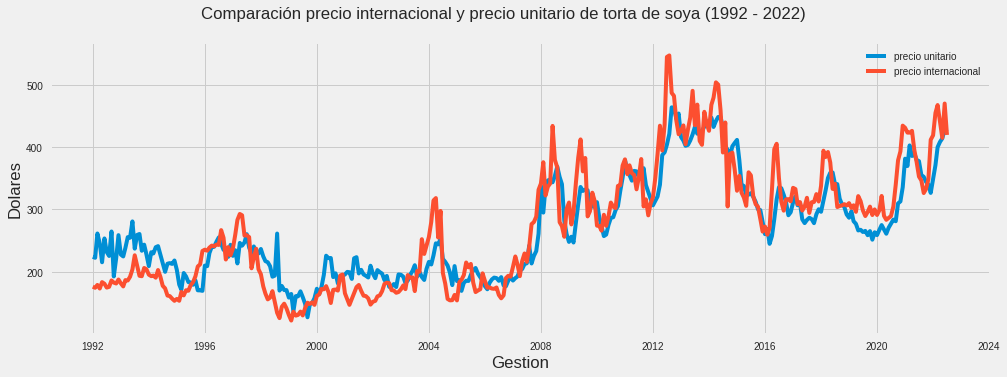

In [ ]:
comm_line(df_expo, 813, 'VALOR_FOB', 'torta de soya', df_harina, 0, -3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


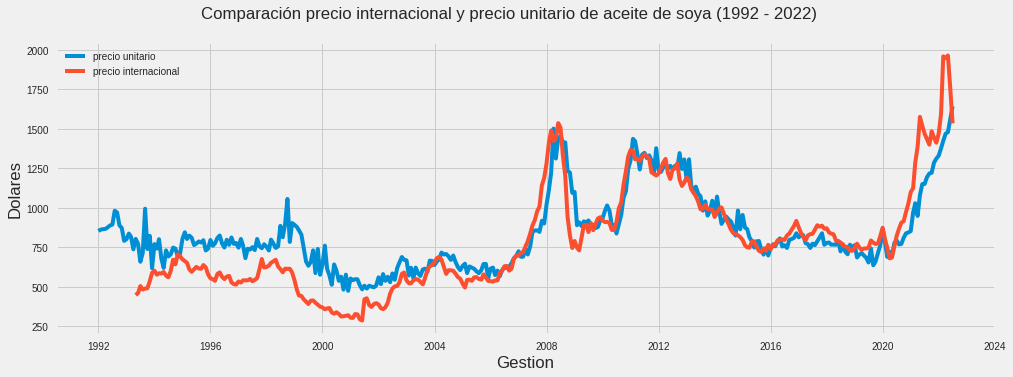

In [ ]:
comm_line(df_expo, 4211, 'VALOR_FOB', 'aceite de soya', df_aceite, 8, 360)